ALI Mohamed M1 OIVM

**TP2 ATDN : Optimisation Bayésienne et Modèles Bayésiens à Noyau**

**Partie 1 : Optimisation Bayésienne**

**Fondements théoriques**

1. Expliquez le principe de l'optimisation bayésienne.
Décrivez comment elle permet de gérer les fonctions coûteuses à évaluer.


**L'optimisation bayésienne permet de trouver le point optimum d'une fonction, c'est à dire qu'elle permet de trouver le maximum ou le minimum pour une fonction coûteuse à évaluer, en reposant sur une modélisation probabiliste**.

**Elle permet de gérer les fonctions coûteuse à évaluer via le processus Gaussien afin d'obtenir une estimation probabiliste de la fonction. De plus, l'optimisation bayésienne permet une convergence plus rapide vers des solution optimales tout en minimisant le plus les itérations**.

2. Définissez et expliquez les processus gaussiens.
Pourquoi sont-ils utilisés pour modéliser la fonction objective ?


**Un processus gaussien est en faite une distribution de fonctions où tous les points suit une distribution gaussienne jointe**.

**On utilise le processus gaussien pour modéliser la fonction objective car il permet de quantifier l'incertitude et permet de modéliser une fonction grâce à une estimation probabiliste (moyenne et variance (incertitude))**.

3. Décrivez les principales fonctions d’acquisition (Expected Improvement, Upper
Confidence Bound, etc.).
Expliquez leur rôle dans le compromis exploration/exploitation.

**Les fonctions d'acquisition permet de choisir de manière intelligente le prochain point à tester dans l'optimisation bayésienne. Elle permet de trouver un équilibre entre Exploration (teste des zones peu connues pour mieux comprendre la fonction) et Exploitation (se concentre sur les zones déja identifiées comme prometteuses)**.

**Expected Improvement (EI) : sélectionne le point qui a le plus de chances d'améliorer le meilleur résultat connu**.

**Upper Confidence Bound (UCB) : favorise les zones où l’incertitude est élevée pour explorer de nouvelles possibilités**.

**Probability of Improvement (PI) : choisit le point ayant la plus grande probabilité d’être meilleur que l’optimum actuel**.

**Implémentation et applications**

4. Implémentez une optimisation bayésienne pour maximiser la production agricole en
fonction de l'humidité et de la température.
Visualisez les étapes du processus

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv("/content/tp2_atdn_donnees.csv")

print(data.head())

   Humidité (%)  Température (°C)  pH du sol  Précipitations (mm) Type de sol  \
0     52.472407         27.454043   6.055399           179.770446    Limoneux   
1     87.042858         23.402409   7.125703           169.795469    Limoneux   
2     73.919637         17.738190   8.118838            56.410516    Limoneux   
3     65.919509         30.344875   7.696675           135.311957     Sableux   
4     39.361118         27.118279   7.919683           145.048905     Sableux   

   Rendement agricole (t/ha)  
0                   7.038885  
1                   7.712547  
2                   6.587578  
3                   7.907268  
4                   6.889830  


In [21]:
#Définition des variables explicatives et de la cible
X = data[["Humidité (%)", "Température (°C)"]]
y = data["Rendement agricole (t/ha)"]

In [6]:
from sklearn.model_selection import train_test_split

#Division des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


5. Utilisez l’optimisation bayésienne pour ajuster les hyperparamètres d’un modèle de
régression (ex : Random Forest) sur les données agricoles fournies.
Comparez les résultats avec Grid Search et Random Search

In [7]:
from sklearn.ensemble import RandomForestRegressor

#Modèle de régression
model = RandomForestRegressor(n_estimators=50, random_state=42).fit(X_train, y_train)


In [9]:
pip install scikit-learn scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.0 MB/s eta 0:00:00


In [23]:
from skopt import gp_minimize
from skopt.space import Real
from skopt.utils import use_named_args

#Optimisation bayésienne
space = [Real(30, 90, name='Humidité (%)'),
         Real(10, 35, name='Température (°C)')]

@use_named_args(space)
def objective(**params):
  x = np.array([[params["Humidité (%)"], params["Température (°C)"]]])
  return -model.predict(x)[0]

res = gp_minimize(objective, space, n_calls=20, random_state=42)

print("Optimisation Bayésienne :", {"Humidité (%)": res.x[0], "Température (°C)": res.x[1]})

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KernelRidge was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KernelRidge was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KernelRidge was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KernelRidge was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KernelRidge was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.

Optimisation Bayésienne : {'Humidité (%)': 78.1182439493666, 'Température (°C)': 15.213055739474138}


**Résultat de l'optimisation bayésienne : Optimisation Bayésienne : {'Humidité (%)': 78.1182439493666, 'Température (°C)': 15.213055739474138}**


**L'optimisation bayésienne a identifié, prédit que les conditions optimales pour maximiser le rendement agricole sont : une humidité élevée(78%) et une température aux alentoures de 15°C**.

In [24]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#Comparaison avec Grid Search et Random Search

param_grid = {"n_estimators": [10, 50, 100], "max_depth": [5, 10, 20, None]}
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=3)
grid_search.fit(X_train, y_train)
print("Meilleurs paramètres (Grid Search) :", grid_search.best_params_)

param_dist = {"n_estimators": np.arange(10, 101, 10), "max_depth": [5, 10, 20, None]}
random_search = RandomizedSearchCV(RandomForestRegressor(), param_dist, cv=3, n_iter=10)
random_search.fit(X_train, y_train)
print("Meilleurs paramètres (Random Search) :", random_search.best_params_)

Meilleurs paramètres (Grid Search) : {'max_depth': 5, 'n_estimators': 50}
Meilleurs paramètres (Random Search) : {'n_estimators': np.int64(20), 'max_depth': 5}


**Tout d'abord, Grid Search et Random Search optimisent les hyperparamètres du modèle pour améliorer la précision**.

**Grid Search permet de tester toutes les combinaisons possibles et choisit la meilleure en fonction des performances sur les données d'entraînement**.

**Par contre, Random Search permet de tester un sous ensemble aléatoire des combinaisons. Il peut donner des résultats similaires au Grid Search mais avec un peu de variance**.

**On constate que les résultats du Grid Search sont :**    

**. max_depth = 5**

**. n_estimators = 50**

**Ce qui signifie que la profondeur des arbres du modèles Random Forest est limitée à 5 niveaux, et la forêt contient 50 arbres, ce qui permet d'améliorer la stabilité (robustesse) des prédictions en évitant le sur-apprentissage**.

**Cette fois ci, on constate que les résultats de Random Search sont quasiment similaire au Grid Search mais avec un nombre d'arbres plus faible**.

**En effet, les résultats de Random Search sont :**    

**. max_depth = 5**

**. n_estimators = 20**

**On comprend donc que le Grid Search et le Random Search permettent d'optimiser un modèle. Cependant, Grid Search est plus long à éxecuter alors que Random Search est plus rapide à exécuter mais moins précis**.

6. Visualisez le processus d'optimisation (courbe de convergence, choix des points).
Commentez la manière dont le modèle explore l’espace de recherche.

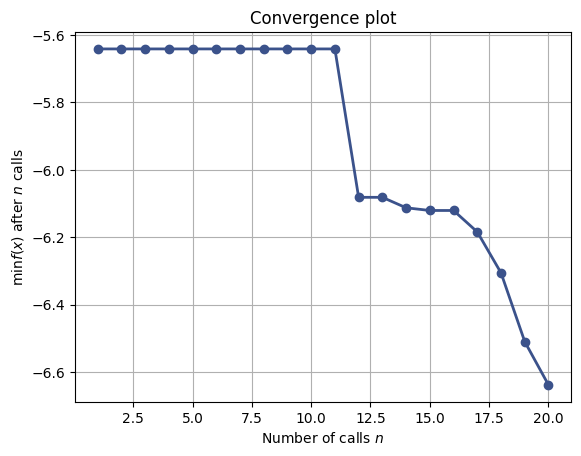

In [26]:
import matplotlib.pyplot as plt
from skopt.plots import plot_convergence

#Visualisation du processus d'optimisation

plot_convergence(res)
plt.show()


**En observant le Convergence Plot, on peut analyser la manière dont l'optimisation bayésienne explore l'espace de recherche des hyperparamètres**.

**On constate d'abord une première une phase où l'optimisation explore différentes valeurs sans amélioration significative (entre 0 et 10 itérations)**.

**Ensuite, on observe une forte descente de la fonction objectif aux alentour de l'intervalle 10-17 itérations. Cela peut indiqué que l'algorithme a identifié une région prometteuse et commence trouver les meilleures hyperparamètres dans cette zone, et affine donc rapidement la solution**.

**Enfin, à partir de 17 itérations, on constate que la valeur optimal est atteinte et qu'elle ne s'améliore presque plus. Cela veut dire que l'algorithme converge vers un ensemble d'hyperparamètre optimal et qu'il n'explore plus de nouvelles zones dans l'espace de recherche**.

**Nous avons donc ici une bonne exploration avec une convergence efficace**.

7. Analysez les avantages et limites de l’optimisation bayésienne face aux méthodes
classiques.


**On constate que l'optimisation bayésienne est plus efficace que les méthodes classiques lorsque l'évaluation d'un modèle est coûteuse, que l'espace de recherche est large et continu, et qu'on veut optimiser un modèle avec peu d'itérations**.

**Par contre, elle est moins adaptée lorsque les hyperparamètres sont discret, que le bruit dans les évaluations est important ou lorsque l'on se trouve dans un espace de très grande dimension**.

**Partie 2 : Modèles Bayésiens à Noyau**

**Fondements théoriques**

8. Expliquez le concept d’inférence bayésienne.
Comment met-on à jour les croyances avec de nouvelles données ?

**Le concept d'inférence bayésienne repose sur le théorème de Bayes, qui permet de mettre à jour les croyances sur un paramètre ou une hypothèse à partir de nouvelles données. Le concept fondamental de l'inférence bayésienne est que nous avons au départ une croyance a priori, et lorsque nous obtenons de nouvelles données, nous utilisons ces informations pour ajuster cette croyance pour obtenir une croyance a posteriori**.

**L'inférence bayésienne consiste à utiliser la formule de Bayes :**    

**P(θ∣D)= [P(D)P(D∣θ)]/P(θ)**

**où :**    

. **𝑃(𝜃∣𝐷) est la distribution a posteriori**

. **P(D∣θ) est la vraisemblance**

. **P(θ) est la distribution a priori**

. **P(D) est la vraisemblance marginale des données**

**Lorsqu'on obtient de nouvelles données, la vraisemblance est ajustée, ce qui permet de réévaluer et de mettre à jour la distribution a posteriori, qui devient la nouvelle "croyance" après l'observation des données**.


9. Décrivez la théorie des méthodes à noyau et leur lien avec les processus gaussiens.
Pourquoi utiliser un noyau dans un modèle bayésien ?

**Les méthodes à noyau sont des techniques d’apprentissage qui utilisent une fonction noyau pour transformer les données dans un espace de caractéristiques, de dimensions plus élevé où des modèles plus simples (comme les hyperplans avec les SVM) peuvent être utilisés pour la séparation ou la régression.**

**Les processus gaussiens sont définis par un noyau qui met en lien la corrélation entre les observations. L’utilisation d’un noyau dans les processus gaussiens permet de définir la structure spatiale et la dépendance entre les données de manière flexible et non paramétrique**.

**Dans un modèle bayésien, un noyau permet de modéliser des relations complexes entre les données sans avoir besoin de spécifier une forme explicite pour les relations entre les points de données. Cela permet de mieux capturer des groupes non linéaires et d’améliorer la généralisation du modèle aux nouvelles données**.

10. Qu’est-ce qu’une distribution a priori et une distribution a posteriori ?
Donnez un exemple appliqué à la prédiction de rendement agricole.

***Distribution a prior :***

**Distribution de probabilité représentant la connaissance ou l'incertitude d'un objet de données avant ou avant son observation**.

***Distribution a postérieur :***

**Distribution de probabilité conditionnelle représentant les paramètres probables après l'observation de l'objet de données**.

**Exemple : On veut prédire la probabilité qu'un patient ait une certaine maladie**.

**A priori : supposons qu'une étude préalable sur la population générale nous dit qu'il y a 5% des personnes qui ont cette maladie. Donc, avant même de recevoir les résultats des test d'un patient, notre croyance a priori est que la probabilité que ce patient ait la maladie est de 5%**.

**A posteriori : Après avoirr fait un test de dépistage, on recoit des résultats qui indiquent que le patient présente certains signes compatibles avec la maladie. Via la formule de Bayes nous pouvons mettre à jour la croyance a priori pour obtenir la probabilité a posteriori que le patient ait réellement la maladie en fonction des résultats du test**.

**Implémentation et applications**

11. Implémentez une régression bayésienne à noyau sur les données agricoles fournies.
• Visualisez les prédictions et les intervalles de confiance.

In [27]:
#On charge les données
dataf = pd.read_csv("/content/tp2_atdn_donnees.csv")

#séparation de données
X = dataf[['Température (°C)', 'Humidité (%)']]  # Choisir les colonnes indépendantes
y = dataf['Rendement agricole (t/ha)']  # La variable cible (rendement)

from sklearn.kernel_ridge import KernelRidge

#Modèle de régression à noyau (noyau RBF)
model = KernelRidge(kernel='rbf', alpha=1.0)
model.fit(X_train, y_train)

#Prédictions
y_pred = model.predict(X_test)

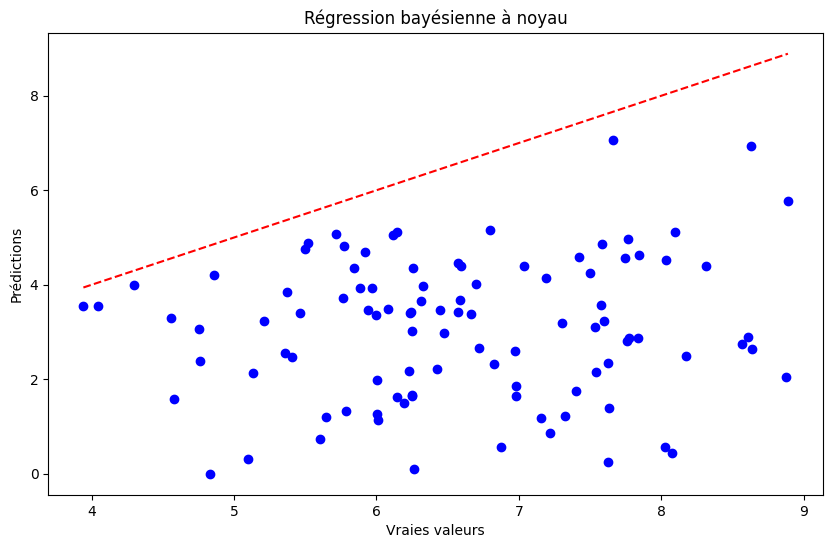

In [28]:
#Visualisation des prédictions
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Vraies valeurs')
plt.ylabel('Prédictions')
plt.title('Régression bayésienne à noyau')
plt.show()

**Analyse du graphique ce dessus :**    

**Les points bleu représentent les prédictions du modèle par rapport aux vraies valeurs**.

**La ligne rouge en pointillé est la ligne y=x, où les prédictions seraient parfaitement alignées avec les vraies valeurs**.

**On constate que les points sont éparpillés, ce qui montre que le modèle n'explique pas bien la relation entre température, humidité et rendement**.

**De plus, l'échelle du rendement est entre 0 et 10, ca veut dire que nous avons une grande erreur grace au RMSE qui est de 3.92**.

**On peut essayer avec un autre noyaux pour mieux capter les relations**.

In [18]:
#Calcul de l'erreur quadratique moyenne (RMSE)

from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

RMSE: 3.9280215291115352


**Cela signifie que en moyenne les prédictions du rendement agricole ont une erreur de 3.92 unités**.

**Maintenant nous allons normaliser nos données afin de résoudre ce problème d'échelle et donc voir si cela a une incidence sur les résultats**. **Car nous avons remarqué sur le modèle ci dessus qu'il y avait une erreur sur la prédiction du modèle avec une mauvaise prédiction.**

In [35]:
from sklearn.preprocessing import StandardScaler

# Normaliser les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



RMSE: 0.9169258833756707


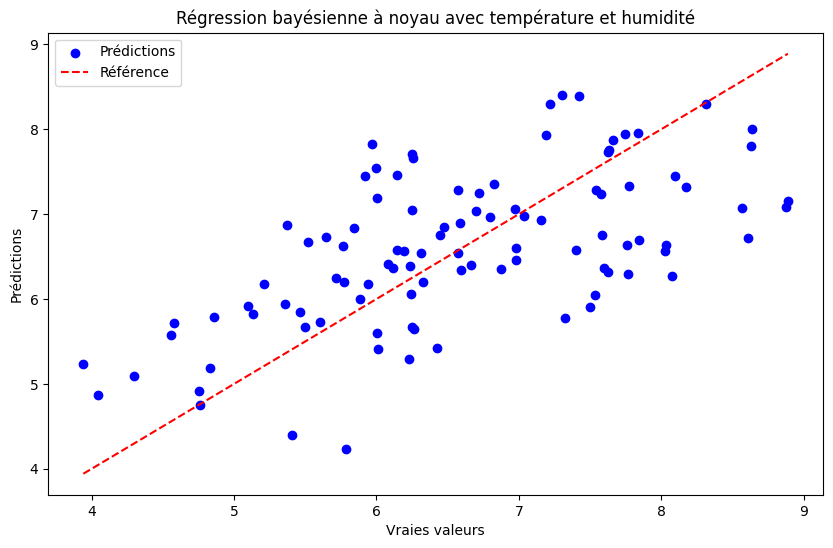

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Entraînement du modèle avec un noyau RBF
model = KernelRidge(kernel='rbf', alpha=1.0)
model.fit(X_train_scaled, y_train)

#Prédictions sur l'ensemble de test
y_pred = model.predict(X_test_scaled)

#Calcul de l'erreur quadratique moyenne (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

#Visualisation des prédictions par rapport aux vraies valeurs
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Prédictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Référence')
plt.xlabel('Vraies valeurs')
plt.ylabel('Prédictions')
plt.title('Régression bayésienne à noyau avec température et humidité')
plt.legend()
plt.show()

**Après normalisation de nos données, on constate que l'erreur RMSE est maintenant de 0.91, ce qui est plus bas que la valeur précédente, ce qui indique une net amélioration**.

**On constate que nous avons un meilleur alignement, les points semblent plus proche de la diagonale rouge, ce qui montre que le modèle prédit mieux les valeurs réelles**.

**De plus, nous avons une réduction de la dispersion (même si certaines prédictions restent écartée)**.

**Conclusion : La normalisation des données a permis d'améliorer la précision du modèle en réduisant l'erreur de prédiction**.

12. Réalisez une classification bayésienne à noyau pour prédire le type de sol (argileux,
sableux, limoneux) en fonction des données climatiques.
• Comparez les résultats avec un SVM classique.

13. Analysez l’incertitude dans les prédictions.
• Commentez les zones où le modèle est moins confiant


In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report


#Charger les données
dataff = pd.read_csv("/content/tp2_atdn_donnees.csv")

#Sélectionner les variables climatiques comme X (température, humidité, précipitations)
X = dataff[['Température (°C)', 'Humidité (%)', 'Précipitations (mm)']]  #Variables indépendantes (climatiques)

#La variable cible est le type de sol (argileux, sableux, limoneux)
y = dataff['Type de sol']  # Cible (type de sol)

#Diviser les données en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Normaliser les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
#Modèle bayésien à noyau (Gaussian Process Classifier)
from sklearn.gaussian_process.kernels import RBF

gp_model = GaussianProcessClassifier(kernel=RBF())  # Instantiate the RBF kernel
gp_model.fit(X_train_scaled, y_train)

#Prédictions sur l'ensemble de test
y_pred_gp = gp_model.predict(X_test_scaled)

#Évaluation du modèle bayésien
print("Rapport de classification pour le modèle bayésien à noyau :")
print(classification_report(y_test, y_pred_gp))

/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Rapport de classification pour le modèle bayésien à noyau :
              precision    recall  f1-score   support

    Argileux       0.31      1.00      0.47        31
    Limoneux       0.00      0.00      0.00        35
     Sableux       0.00      0.00      0.00        34

    accuracy                           0.31       100
   macro avg       0.10      0.33      0.16       100
weighted avg       0.10      0.31      0.15       100



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [46]:
# Modèle SVM classique avec noyau RBF
svm_model = SVC(kernel='rbf')  # SVM avec noyau RBF
svm_model.fit(X_train_scaled, y_train)

# Prédictions sur l'ensemble de test
y_pred_svm = svm_model.predict(X_test_scaled)

# Évaluation du modèle SVM
print("Rapport de classification pour le modèle SVM :")
print(classification_report(y_test, y_pred_svm))

Rapport de classification pour le modèle SVM :
              precision    recall  f1-score   support

    Argileux       0.28      0.61      0.39        31
    Limoneux       0.29      0.23      0.25        35
     Sableux       0.20      0.03      0.05        34

    accuracy                           0.28       100
   macro avg       0.26      0.29      0.23       100
weighted avg       0.26      0.28      0.23       100



**Analyse des résultats :**    

**Pour la classification bayésienne avec noyaux, on constate que le modèle identifie bien les sols argileux avec n rappel de 1.00. Par contre, nous avons une précision très faible pour les sols de type limoneux et sableux (00.0 en F1-score). On a en plus de cela un accuracy de 31%, ce qui est proche du hasard.**

**Pour les résultats avec un SVM classique, on constate que nous avons un meilleur équilibre entre les classes comparé au modèle bayésien. La classe limoneux est mieux détectée qu'avec la méthode bayésienne. Cependant, nous avons une mauvaise prédiction pour les sol du type sableux avec 0.12 en rappel**.

**Modèle bayésien à noyau :**    

**Le faible rappel pour les sols limoneux et sableux (00.0) indique que le modèle ne sait pas comment les classer, ce qui signifie une incertitude très élevée pour ces classes**.

**Modèle SVM :**    

**Le faible F1-score global (0.28) montre que le modèle hésite entre les classes, ce qui indique une incertitude élevée.**

**Les faibles précisions pour les sols sableux et limoneux montrent que le modèle fait beaucoup d'erreurs.**